In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

In [2]:
role = get_execution_role()
bucket='ds6-yelp-reviews'
data_key = 'tip.json'
data_location = 's3://{}/{}'.format(bucket, data_key)

df = pd.read_json(data_location, lines=True)

In [4]:
print(df.shape)
df.head()

(1223094, 5)


,business_id,compliment_count,date,text,user_id
0,VaKXUpmWTTWDKbpJ3aQdMw,0,2014-03-27 03:51:24,"Great for watching games, ufc, and whatever el...",UPw5DWs_b-e2JRBS-t37Ag
1,OPiPeoJiv92rENwbq76orA,0,2013-05-25 06:00:56,Happy Hour 2-4 daily with 1/2 price drinks and...,Ocha4kZBHb4JK0lOWvE0sg
2,5KheTjYPu1HcQzQFtm4_vw,0,2011-12-26 01:46:17,Good chips and salsa. Loud at times. Good serv...,jRyO2V1pA4CdVVqCIOPc1Q
3,TkoyGi8J7YFjA6SbaRzrxg,0,2014-03-23 21:32:49,The setting and decoration here is amazing. Co...,FuTJWFYm4UKqewaosss1KA
4,AkL6Ous6A1atZejfZXn1Bg,0,2012-10-06 00:19:27,Molly is definately taking a picture with Sant...,LUlKtaM3nXd-E4N4uOk_fQ


In [8]:
df['compliment_count'].describe()

count    1.223094e+06
mean     1.647380e-02
std      1.456401e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.500000e+01
Name: compliment_count, dtype: float64

In [9]:
def com_length(text):
    return len(text)

In [11]:
df['len_tip'] = df['text'].apply(lambda x: com_length(x))

In [12]:
import seaborn as sns

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


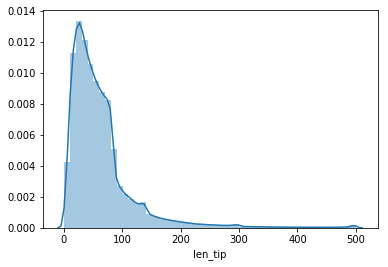

In [13]:
sns.distplot(df['len_tip'])